In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
import matplotlib.patches as mpatches
import io
from adjustText import adjust_text
import math # Diperlukan untuk math.ceil di create_grid

In [2]:
df = pd.read_csv("Data/jumlah_penduduk_2018_2023.csv")
df

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
0,0-4,"12.107,1","11.622,5","23.729,6",2018
1,5-9,"12.199,0","11.679,4","23.878,4",2018
2,10-14,"11.732,1","11.146,6","22.878,7",2018
3,15-19,"11.378,7","10.864,2","22.242,9",2018
4,20-24,"11.097,1","10.726,2","21.823,3",2018
...,...,...,...,...,...
97,60-64,"5.676,6","5.813,7","11.490,3",2023
98,65-69,"4.183,9","4.344,5","8.528,4",2023
99,70-74,"2.695,1","2.920,6","5.615,8",2023
100,75+,"2.314,2","2.993,5","5.307,7",2023


In [3]:
# Daftar kolom yang ingin dikonversi
cols = [
    'Penduduk (Laki-Laki) (Ribu)',
    'Penduduk (Perempuan) (Ribu)',
    'Penduduk (Laki-Laki + Perempuan) (Ribu)'
]

df1 = df.copy()

# Ubah format desimal lokal (koma) ke titik, hapus pemisah ribuan jika ada
for col in cols:
    df1[col] = (
        df1[col]
        .str.replace('.', '', regex=False)        
        .str.replace(',', '.', regex=False)       
        .astype(float)                            
    )
    
df1.head()

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
0,0-4,12107.1,11622.5,23729.6,2018
1,5-9,12199.0,11679.4,23878.4,2018
2,10-14,11732.1,11146.6,22878.7,2018
3,15-19,11378.7,10864.2,22242.9,2018
4,20-24,11097.1,10726.2,21823.3,2018


In [4]:
df1["Kelompok Umur"].value_counts()

Kelompok Umur
0-4             6
5-9             6
75+             6
70-74           6
65-69           6
60-64           6
55-59           6
50-54           6
45-49           6
40-44           6
35-39           6
30-34           6
25-29           6
20-24           6
15-19           6
10-14           6
Jumlah/Total    4
Indonesia       2
Name: count, dtype: int64

In [5]:
df1[df1["Kelompok Umur"] == "Indonesia"]

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
16,Indonesia,133136.1,131879.2,265015.3,2018
33,Indonesia,134657.6,133416.9,268074.6,2019


In [6]:
df1["Kelompok Umur"] = df1["Kelompok Umur"].replace("Indonesia", "Jumlah/Total")
df1

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
0,0-4,12107.1,11622.5,23729.6,2018
1,5-9,12199.0,11679.4,23878.4,2018
2,10-14,11732.1,11146.6,22878.7,2018
3,15-19,11378.7,10864.2,22242.9,2018
4,20-24,11097.1,10726.2,21823.3,2018
...,...,...,...,...,...
97,60-64,5676.6,5813.7,11490.3,2023
98,65-69,4183.9,4344.5,8528.4,2023
99,70-74,2695.1,2920.6,5615.8,2023
100,75+,2314.2,2993.5,5307.7,2023


In [7]:
pyramid_chart = df1[df1["Kelompok Umur"] != "Jumlah/Total"]
pyramid_chart

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
0,0-4,12107.1,11622.5,23729.6,2018
1,5-9,12199.0,11679.4,23878.4,2018
2,10-14,11732.1,11146.6,22878.7,2018
3,15-19,11378.7,10864.2,22242.9,2018
4,20-24,11097.1,10726.2,21823.3,2018
...,...,...,...,...,...
96,55-59,7133.3,7231.3,14364.6,2023
97,60-64,5676.6,5813.7,11490.3,2023
98,65-69,4183.9,4344.5,8528.4,2023
99,70-74,2695.1,2920.6,5615.8,2023


In [9]:
df_2019 = pyramid_chart[pyramid_chart["Tahun"] == 2019]
df_2019.head()

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
17,0-4,12044.8,11560.1,23604.9,2019
18,5-9,12234.2,11739.7,23973.8,2019
19,10-14,11824.8,11232.4,23057.1,2019
20,15-19,11406.2,10888.0,22294.2,2019
21,20-24,11167.6,10750.0,21917.6,2019


In [10]:
def create_age_distribution(year):
    df2 = pyramid_chart.copy()
    df2 = df2[df2["Tahun"]== year]
    
    kelompok_usia_labels = df2['Kelompok Umur'].tolist()
    
    ax = sns.barplot(y=kelompok_usia_labels, x=df2[df2['Tahun'] == year]['Penduduk (Laki-Laki) (Ribu)'] * -1, orient="h", color=MALE_COLOR)
    ax = sns.barplot(y=kelompok_usia_labels, x=df2[df2['Tahun'] == year]['Penduduk (Perempuan) (Ribu)'], orient="h", color=FEMALE_COLOR)
    
    return ax

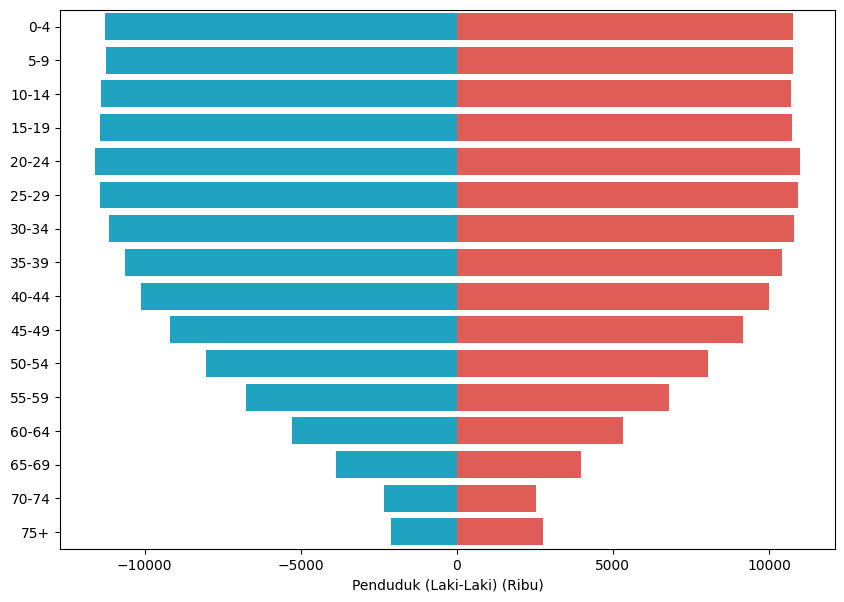

In [16]:

FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"

fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    year=2021
)

plt.show()

In [13]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.labelcolor": text_color,

        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "font.family": font_family,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)
    
FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"

set_seaborn_style(
    font_family="monospace",
    background_color="#253D5B",
    grid_color="#355882",
    text_color="#EEEEEE"
)

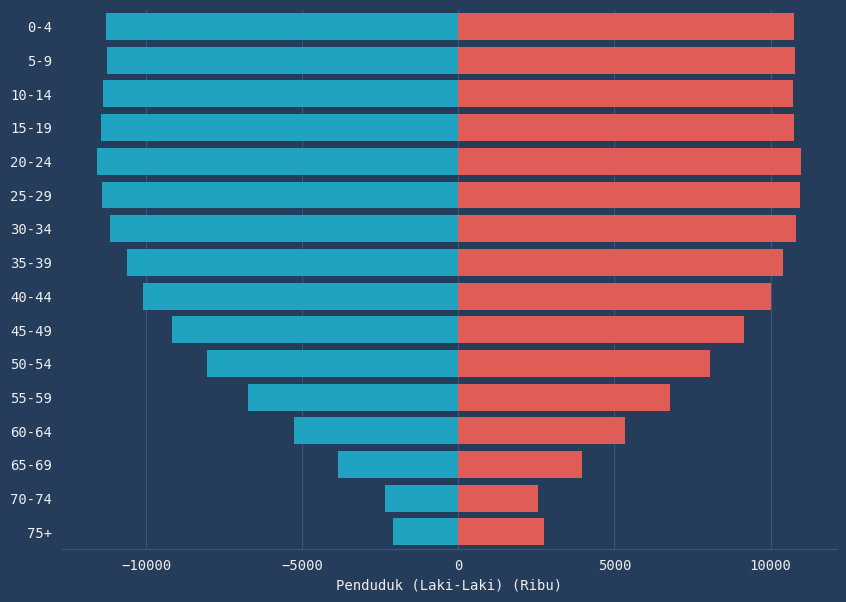

In [18]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    year=2021
)

plt.show()

In [19]:
def create_x_labels(ax, xformat):
    if xformat == "billions":
        return ["{}B".format(round(abs(x / 1e9))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "millions":
        return ["{}M".format(round(abs(x / 1e6))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "thousands":
        return ["{}K".format(round(abs(x / 1e3))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "percentage":
        return ["{}%".format(round(abs(x), 1)) for x in ax.get_xticks()[1:-1]]

In [20]:
def format_ticks(ax, xformat, xlim=(None, None)):
    ax.tick_params(axis="x", labelsize=12, pad=8)
    ax.tick_params(axis="y", labelsize=12)
    ax.set(ylabel=None, xlabel=None, xlim=xlim)
    
    plt.xticks(
        ticks=ax.get_xticks()[1:-1],
        labels=create_x_labels(ax, xformat)
    )

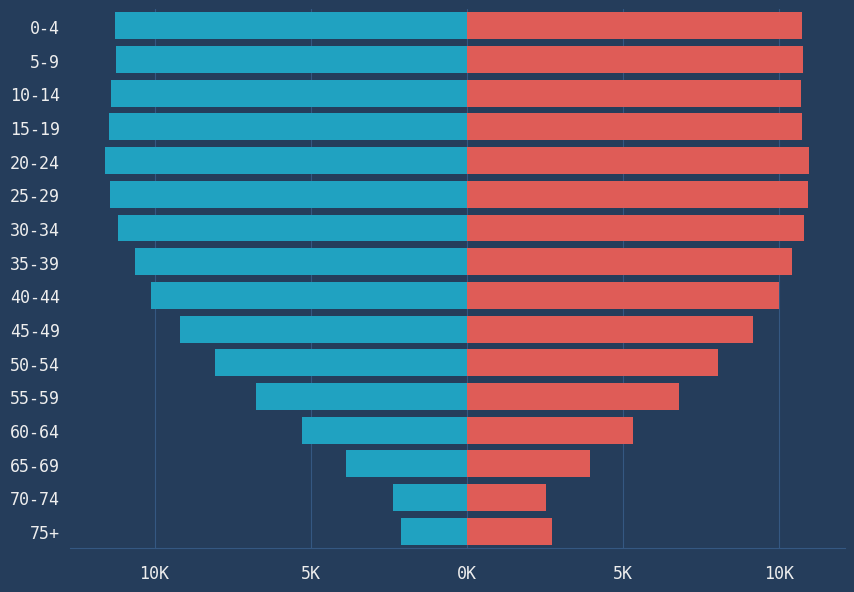

In [21]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    year=2021
)

# New functions
format_ticks(ax, xformat="thousands")

plt.show()

In [22]:
from matplotlib.patches import Patch

def add_legend(x, y): 
    patches = [
        Patch(color=MALE_COLOR, label="Male"),
        Patch(color=FEMALE_COLOR, label="Female")
    ]
    
    leg = plt.legend(
        handles=patches,
        bbox_to_anchor=(x, y), loc='center',
        ncol=2, fontsize=15,
        handlelength=1, handleheight=0.4,
        edgecolor="#253D5B"
    )

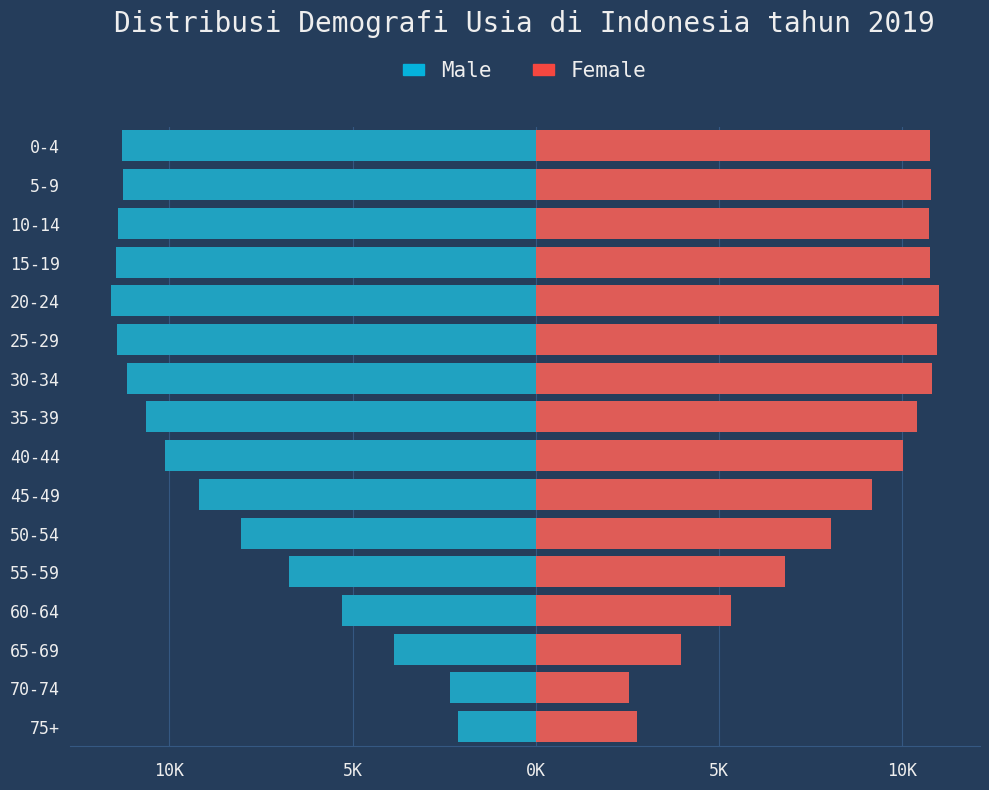

In [23]:
fig = plt.figure(figsize=(10, 8))

ax = create_age_distribution(
    year=2021
)

# New functions
format_ticks(ax, xformat="thousands")
add_legend(x=0.5, y=1.09)
plt.title("Distribusi Demografi Usia di Indonesia tahun 2019", y=1.14, fontsize=20)

plt.tight_layout()
plt.show()

In [24]:
def create_image_from_figure(fig):
    plt.tight_layout()
    
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    plt.close() 
    
    return Image.fromarray(data)

In [27]:
# --- Warna ---
MALE_COLOR = '#3498db'
FEMALE_COLOR = '#F72798'
POSITIVE_CHANGE_COLOR = '#06D001'
NEGATIVE_CHANGE_COLOR = '#FF204E'
# --- Fungsi create_age_distribution ---
def create_age_distribution(year, data_df):
    """
    Membuat plot piramida penduduk untuk tahun tertentu, dengan
    anotasi teks persentase perubahan dari tahun sebelumnya.
    """
    current_year = int(year)
    previous_year = current_year - 1

    # Ambil data tahun ini
    df_year = data_df[data_df['Tahun'] == current_year].copy()
    if df_year.empty:
        print(f"Tidak ada data untuk tahun {current_year}.")
        return None, None

    # Ambil data tahun sebelumnya 
    df_previous_year = data_df[data_df['Tahun'] == previous_year].copy()
    has_previous_data = not df_previous_year.empty
    df_year_indexed = df_year.set_index('Kelompok Umur')
    kelompok_usia_labels = df_year_indexed.index.tolist() 
    y_coords = np.arange(len(kelompok_usia_labels))

    # Buat Figure dan Axes
    fig, ax = plt.subplots(figsize=(9, 6)) 
    # --- Plot Bar Chart (Tahun Ini) ---
    sns.barplot(ax=ax, y=kelompok_usia_labels, x=df_year_indexed['Penduduk (Laki-Laki) (Ribu)'] * -1,
                orient="h", color=MALE_COLOR, label=f'Laki-Laki {current_year}')
    sns.barplot(ax=ax, y=kelompok_usia_labels, x=df_year_indexed['Penduduk (Perempuan) (Ribu)'],
                orient="h", color=FEMALE_COLOR, label=f'Perempuan {current_year}')

    # --- Tambahkan Anotasi Persentase Perubahan ---
    if has_previous_data:
        # Siapkan data tahun lalu untuk lookup cepat
        prev_data_dict = df_previous_year.set_index('Kelompok Umur').to_dict()

        # Pengaturan Teks Anotasi
        annotation_fontsize = 12
        text_offset_x = df_year_indexed[['Penduduk (Laki-Laki) (Ribu)', 'Penduduk (Perempuan) (Ribu)']].max().max() * 0.02 # Offset kecil berdasarkan skala data

        for i, label in enumerate(kelompok_usia_labels):
            y = y_coords[i]

            # Ambil nilai tahun ini
            curr_male_val = df_year_indexed.loc[label, 'Penduduk (Laki-Laki) (Ribu)']
            curr_female_val = df_year_indexed.loc[label, 'Penduduk (Perempuan) (Ribu)']

            # Ambil nilai tahun lalu
            prev_male_val = prev_data_dict.get('Penduduk (Laki-Laki) (Ribu)', {}).get(label, np.nan)
            prev_female_val = prev_data_dict.get('Penduduk (Perempuan) (Ribu)', {}).get(label, np.nan)

            # --- Anotasi Laki-Laki ---
            if pd.notna(curr_male_val) and pd.notna(prev_male_val):
                if prev_male_val != 0:
                    male_pct_change = ((curr_male_val - prev_male_val) / prev_male_val) * 100
                    male_text = f"{male_pct_change:+.1f}%" 
                    male_color = POSITIVE_CHANGE_COLOR if male_pct_change > 0 else NEGATIVE_CHANGE_COLOR if male_pct_change < 0 else 'black'
                    x_pos_male = curr_male_val * -1 
                    ax.text(x_pos_male - text_offset_x, y, male_text,
                            color=male_color, fontsize=annotation_fontsize,
                            ha='right', va='center', weight='bold') 
                    
            # --- Anotasi Perempuan ---
            if pd.notna(curr_female_val) and pd.notna(prev_female_val):
                 if prev_female_val != 0:
                    female_pct_change = ((curr_female_val - prev_female_val) / prev_female_val) * 100
                    female_text = f"{female_pct_change:+.1f}%"
                    female_color = POSITIVE_CHANGE_COLOR if female_pct_change > 0 else NEGATIVE_CHANGE_COLOR if female_pct_change < 0 else 'black'
                    x_pos_female = curr_female_val 
                    ax.text(x_pos_female + text_offset_x, y, female_text,
                            color=female_color, fontsize=annotation_fontsize,
                            ha='left', va='center', weight='bold') t



    # --- Pengaturan Visual Plot ---
    plot_title = f'Piramida Penduduk Tahun {current_year}'
    ax.set_title(plot_title, fontsize=16, pad=15)

    # Label dan Format Sumbu 
    ax.set_xlabel('Jumlah Penduduk (Ribu)', fontsize=14)
    ax.set_ylabel('Kelompok Umur', fontsize=14)
    formatter = mticker.FuncFormatter(lambda x, pos: f'{abs(int(x))}')
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # --- Legenda (Hanya untuk bar tahun ini) ---
    handles = []
    male_patch = mpatches.Patch(color=MALE_COLOR, label=f'Laki-laki')
    female_patch = mpatches.Patch(color=FEMALE_COLOR, label=f'Perempuan')
    handles.extend([male_patch, female_patch])

    ax.legend(handles=handles, loc='best', fontsize=12) 

    # Despine dan Ticks 
    sns.despine(ax=ax, left=True)
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Layout 
    current_xlim = ax.get_xlim()
    ax.set_xlim(current_xlim[0] * 1.1, current_xlim[1] * 1.1) 
    fig.tight_layout(rect=[0, 0.02, 1, 0.95]) 

    return fig, ax

# --- Fungsi utilitas gambar---
# --- Fungsi create_grid ---
def create_image_from_figure(fig):
    canvas = FigureCanvas(fig)
    canvas.draw()
    width, height = canvas.get_width_height()
    image = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8).reshape((height, width, 4))
    return Image.fromarray(image, 'RGBA')

def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    mode = chart.mode
    if background.startswith('#') and len(background) == 9 and background.endswith('00'):
       mode = "RGBA"; bg_color = background
    elif background.startswith('#') and len(background) == 7:
        mode = "RGB"; bg_color = background
    else: mode = "RGB"; bg_color = "#FFFFFF"
    image = Image.new(mode, (size[0] + left + right, size[1] + top + bottom), bg_color)
    if chart.mode == 'RGBA': image.paste(chart, (left, top), mask=chart.split()[3])
    else: image.paste(chart, (left, top))
    return image

# --- Fungsi create_grid --- 
def create_grid(figures, pad, ncols, grid_background_color):
    """ Membuat grid dari gambar dengan warna latar belakang tertentu. """
    if not figures: return None
    nrows = math.ceil(len(figures) / ncols)
    if nrows <= 0: return None
    size = figures[0].size
    if size[0] <= 0 or size[1] <= 0: return None
    grid_width = ncols * size[0] + (ncols - 1) * pad
    grid_height = nrows * size[1] + (nrows - 1) * pad

    # Tentukan mode grid berdasarkan warna background
    if isinstance(grid_background_color, tuple) and len(grid_background_color) == 4:
        grid_mode = "RGBA"
    elif isinstance(grid_background_color, str) and grid_background_color.startswith('#') and len(grid_background_color) == 9: # #RRGGBBAA
        grid_mode = "RGBA"
    else:
        grid_mode = "RGB"

    # Buat grid_image dengan warna background yang diinginkan
    grid_image = Image.new(grid_mode, (grid_width, grid_height), grid_background_color) 

    for i, figure in enumerate(figures):
        col = i % ncols; row = i // ncols
        x_offset = col * (size[0] + pad); y_offset = row * (size[1] + pad)

        # Penanganan paste agar transparan 
        if figure.mode == 'RGBA':
            if grid_image.mode != 'RGBA':
                grid_image = grid_image.convert('RGBA')
            grid_image.paste(figure, (x_offset, y_offset), mask=figure.split()[3])
        else: 
            grid_image.paste(figure, (x_offset, y_offset))

    return grid_image

# --- Loop Utama ---
figures = []
background_color = "#253D5B"
data_source_df = pyramid_chart 

for year in range(2018, 2024): # Iterasi per tahun
    print(f"Processing year: {year}")

    # Panggil fungsi untuk membuat plot
    fig, ax = create_age_distribution(
        year=str(year),       
        data_df=data_source_df 
    )

    if fig is None or ax is None:
        print(f"Skipping year {year} due to missing data or plot error.")
        continue

    # Konversi figure ke image
    image = create_image_from_figure(fig)
    # Tambahkan padding
    image = add_padding_to_chart(image, 20, 30, 20, 20, background_color)
    figures.append(image)
    plt.close(fig)

if figures:
    print(f"Creating grid with {len(figures)} figures...")
    # Panggil create_grid dengan parameter grid_background_color
    grid = create_grid(figures, pad=20, ncols=3, grid_background_color=background_color) 
    if grid:
        grid.show()
        save_filename = "Distribusi Usia.png"
        try:
            grid.save(save_filename)
            print(f"Grid berhasil disimpan sebagai '{save_filename}'")
        except Exception as e:
            print(f"Gagal menyimpan grid: {e}")
    else:
        print("Gagal membuat grid.")
else:
    print("Tidak ada gambar yang dihasilkan untuk membuat grid.")

Processing year: 2018
Processing year: 2019
Processing year: 2020
Processing year: 2021
Processing year: 2022
Processing year: 2023
Creating grid with 6 figures...
Grid berhasil disimpan sebagai 'Distribusi Usia.png'


# SLOPE CHART

In [7]:
df4 = df1.copy()
df4 = df4[df4["Kelompok Umur"]!= "Jumlah/Total"]
df4 = df4[df4["Kelompok Umur"]!= "Indonesia"]
df4.head()

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun
0,0-4,12107.1,11622.5,23729.6,2018
1,5-9,12199.0,11679.4,23878.4,2018
2,10-14,11732.1,11146.6,22878.7,2018
3,15-19,11378.7,10864.2,22242.9,2018
4,20-24,11097.1,10726.2,21823.3,2018


In [8]:
df4["Kelompok Umur"].value_counts()

Kelompok Umur
0-4      6
5-9      6
10-14    6
15-19    6
20-24    6
25-29    6
30-34    6
35-39    6
40-44    6
45-49    6
50-54    6
55-59    6
60-64    6
65-69    6
70-74    6
75+      6
Name: count, dtype: int64

In [9]:

def kategorikan_usia_modifikasi(kelompok):
    if kelompok in ['0-4']:
        return 'Balita'
    elif kelompok in ['5-9']:
        return 'Anak-anak'
    elif kelompok in ['10-14', '15-19']:
        return 'Remaja'
    # --- Modifikasi di sini ---
    elif kelompok in ['20-24', '25-29', '30-34', '35-39']: 
        return 'Dewasa Awal'
    elif kelompok in ['40-44', '45-49', '50-54', '55-59']: 
        return 'Dewasa Akhir'
    # --- Akhir Modifikasi ---
    elif kelompok in ['60-64', '65-69', '70-74', '75+']:
        return 'Lansia'
    else:
        return 'Tidak Diketahui'

# Perbaikan tabel
df4['Kategori Usia'] = df4['Kelompok Umur'].apply(kategorikan_usia_modifikasi)
df4.loc[:, "Penduduk (Laki-Laki + Perempuan) (Juta)"] = round(df4["Penduduk (Laki-Laki + Perempuan) (Ribu)"] / 1000,2)
df4

,Kelompok Umur,Penduduk (Laki-Laki) (Ribu),Penduduk (Perempuan) (Ribu),Penduduk (Laki-Laki + Perempuan) (Ribu),Tahun,Kategori Usia,Penduduk (Laki-Laki + Perempuan) (Juta)
0,0-4,12107.1,11622.5,23729.6,2018,Balita,23.73
1,5-9,12199.0,11679.4,23878.4,2018,Anak-anak,23.88
2,10-14,11732.1,11146.6,22878.7,2018,Remaja,22.88
3,15-19,11378.7,10864.2,22242.9,2018,Remaja,22.24
4,20-24,11097.1,10726.2,21823.3,2018,Dewasa Awal,21.82
...,...,...,...,...,...,...,...
96,55-59,7133.3,7231.3,14364.6,2023,Dewasa Akhir,14.36
97,60-64,5676.6,5813.7,11490.3,2023,Lansia,11.49
98,65-69,4183.9,4344.5,8528.4,2023,Lansia,8.53
99,70-74,2695.1,2920.6,5615.8,2023,Lansia,5.62


In [10]:
def add_label(continent_name, year):
    
    # Calculate value (and round it)
    y_position = round(df[year][continent_name])
    
    # Determine x_position depending on the year  
    if year==2018:
        x_position = year - 1.2
    else:
        x_position = year + 0.12
    
    # Adding the text
    plt.text(x_position,
             y_position, 
             f'{continent_name}, {y_position}',
             fontsize=8, 
             color='white', 
# Filter data for the years 1952 and 1957
years = [2018, 2023]
df4 = df4[df4['Tahun'].isin(years)]

# Calculate average gdp, per continent, per year
df_jumlah = df4.groupby(['Kategori Usia', 'Tahun'])['Penduduk (Laki-Laki + Perempuan) (Juta)'].sum().unstack()

df_jumlah

Tahun,2018,2023
Kategori Usia,,
Anak-anak,23.88,22.00
Balita,23.73,22.51
Dewasa Akhir,63.89,70.70
Dewasa Awal,83.66,88.35
Lansia,24.76,30.95
Remaja,45.12,44.19


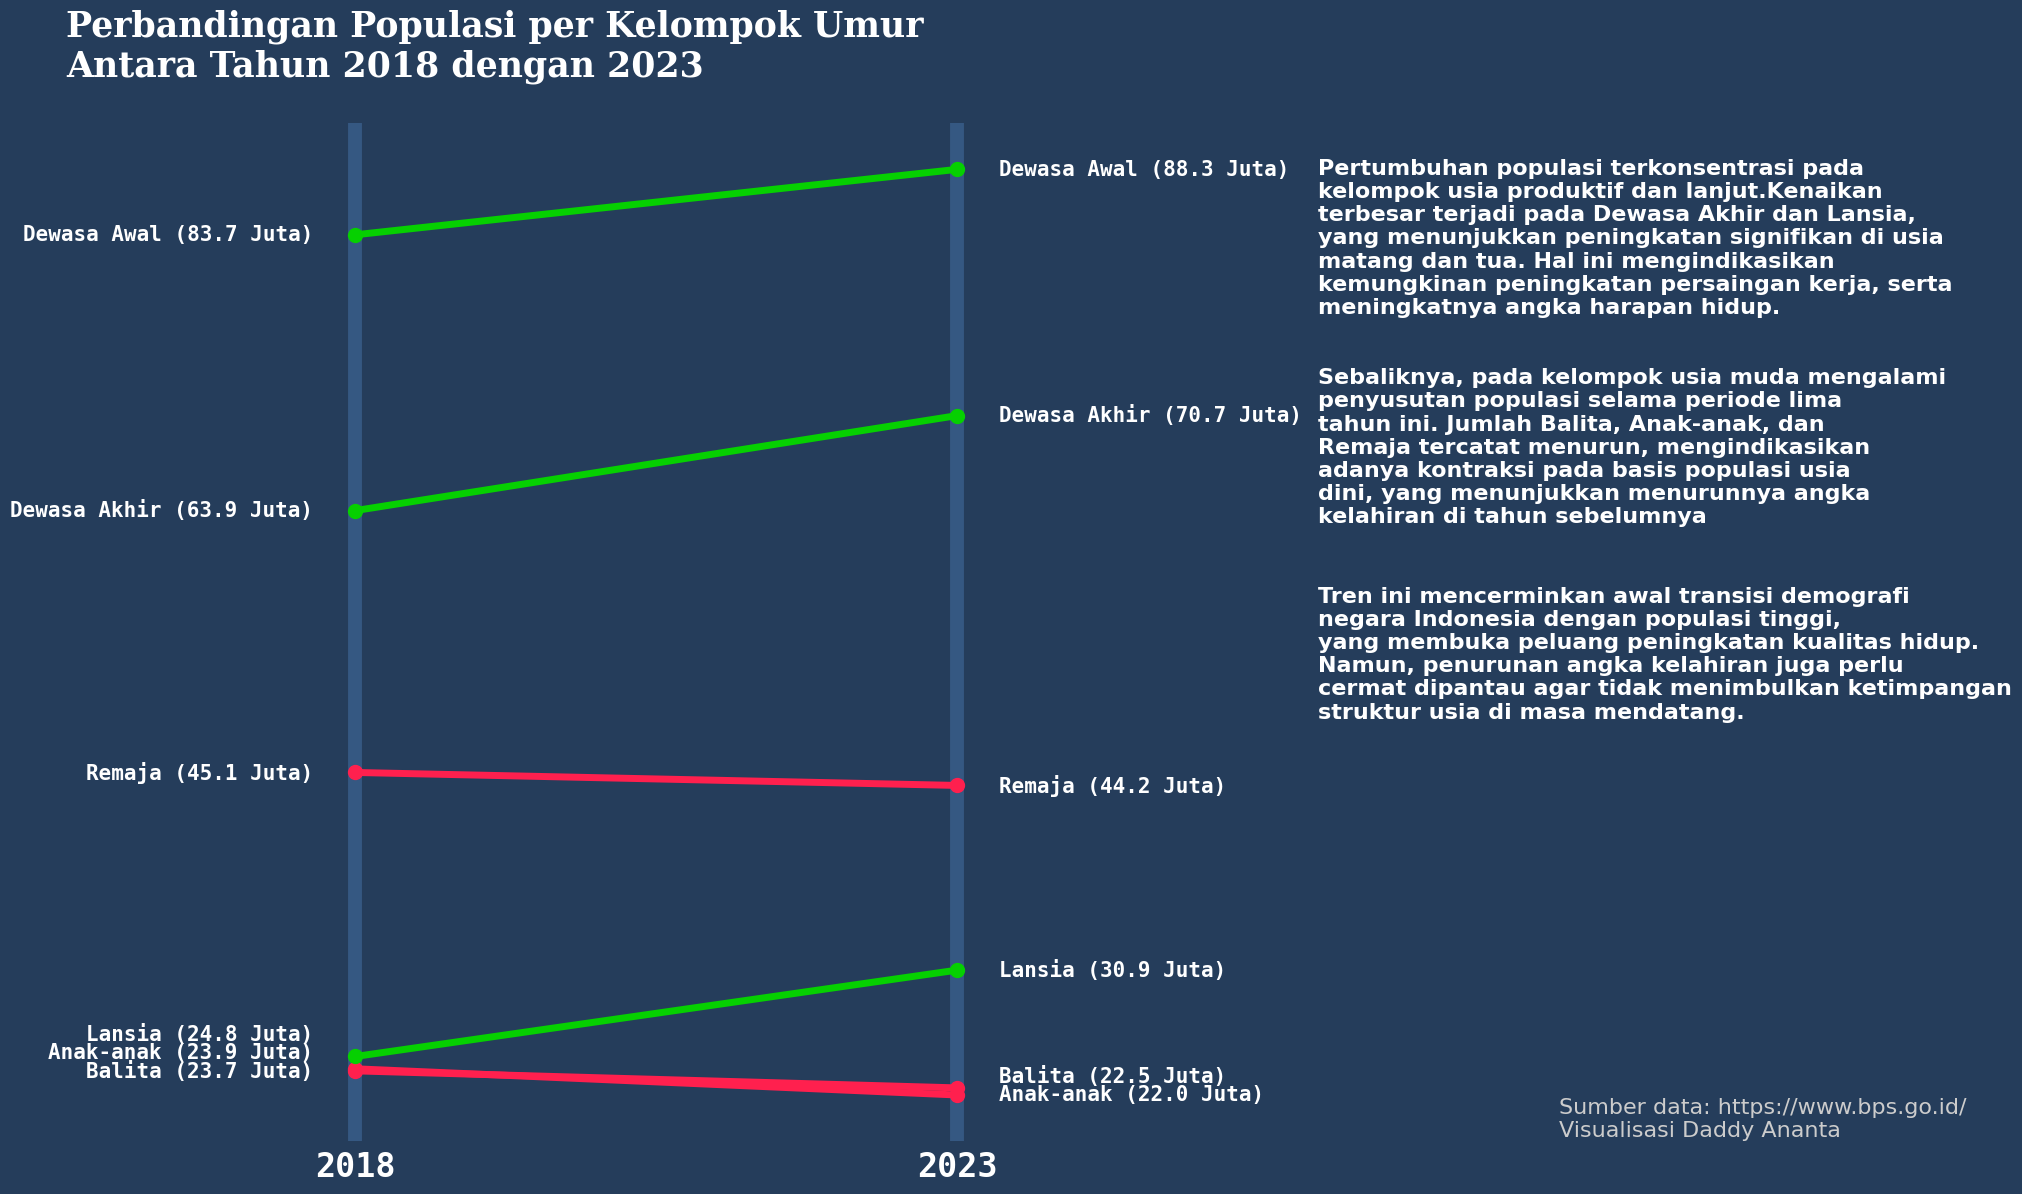

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from adjustText import adjust_text
import numpy as np


df_populasi = df_jumlah.copy()
years = [2018, 2023]


plt.figure(figsize=(20, 12))
plt.xticks(years, fontsize=24, color='white', weight="bold")

ax = plt.gca()

# --- Parameter untuk Penyesuaian Manual ---

min_vertical_separation = (df_populasi[years].values.max() - df_populasi[years].values.min()) * 0.02 

# List untuk menyimpan informasi label sebelum digambar
labels_left = [] 
labels_right = []

# Loop 1: Plot garis dan kumpulkan informasi label
for age_group in df_populasi.index:
    value_before = df_populasi.loc[age_group, years[0]]
    value_after = df_populasi.loc[age_group, years[1]]

    if value_before > value_after: color = '#FF204E'
    elif value_before < value_after: color = '#06D001'
    else: color = 'grey'

    plt.plot(years, df_populasi.loc[age_group, years], marker='o', color=color, linewidth=5, markersize=10)

    label_text = f"{age_group} ({value_before:.1f} Juta)"
    labels_left.append([value_before, value_before, label_text, 'white']) 

    label_text = f"{age_group} ({value_after:.1f} Juta)"
    labels_right.append([value_after, value_after, label_text, 'white'])

# --- Fungsi untuk menyesuaikan posisi Y ---
def adjust_label_positions(labels, separation):
    labels.sort(key=lambda x: x[0])
    last_y = -np.inf 
    for i in range(len(labels)):
        if labels[i][1] < last_y + separation:
            labels[i][1] = last_y + separation 
        last_y = labels[i][1] 
    return labels



plt.text(
    2015.6,
    95,
    f'Perbandingan Populasi per Kelompok Umur\nAntara Tahun {years[0]} dengan {years[1]}',
    fontsize=25,
    color='white',
    fontweight='bold',
    ha='left',
    family='serif' 
)


# Add the BEFORE and AFTER
plt.text(2026, 78, '''Pertumbuhan populasi terkonsentrasi pada\nkelompok usia produktif dan lanjut.Kenaikan\nterbesar terjadi pada Dewasa Akhir dan Lansia,\nyang menunjukkan peningkatan signifikan di usia\nmatang dan tua. Hal ini mengindikasikan\nkemungkinan peningkatan persaingan kerja, serta\nmeningkatnya angka harapan hidup.''', 
         fontsize=16, color='white', fontweight='semibold', ha='left',family='sans-serif')
plt.text(2026, 63, '''Sebaliknya, pada kelompok usia muda mengalami\npenyusutan populasi selama periode lima\ntahun ini. Jumlah Balita, Anak-anak, dan\nRemaja tercatat menurun, mengindikasikan\nadanya kontraksi pada basis populasi usia\ndini, yang menunjukkan menurunnya angka\nkelahiran di tahun sebelumnya''', 
         fontsize=16, color='white', fontweight='semibold', ha='left',family='sans-serif')
plt.text(
    2026,
    49,
    '''Tren ini mencerminkan awal transisi demografi\nnegara Indonesia dengan populasi tinggi,\nyang membuka peluang peningkatan kualitas hidup.\nNamun, penurunan angka kelahiran juga perlu\ncermat dipantau agar tidak menimbulkan ketimpangan\nstruktur usia di masa mendatang.''',
    fontsize=16,
    color='white',
    fontweight='semibold',
    ha='left', family='sans-serif'
)


plt.text(
    2028,
    19,  
    'Sumber data: https://www.bps.go.id/ \nVisualisasi Daddy Ananta',
    fontsize=16,
    color='#CCCCCC',
    ha='left',
    family='sans-serif'
)


# --- Sesuaikan posisi ---
labels_left_adjusted = adjust_label_positions(labels_left, min_vertical_separation)
labels_right_adjusted = adjust_label_positions(labels_right, min_vertical_separation)

# --- Loop 2: Gambar teks---
for y_orig, y_adj, text, color in labels_left_adjusted:
    plt.text(years[0] - 0.35, y_adj, text, ha='right', va='center', fontsize=15, color=color, weight="semibold")

for y_orig, y_adj, text, color in labels_right_adjusted:
    plt.text(years[1] + 0.35, y_adj, text, ha='left', va='center', fontsize=15, color=color, weight="semibold")

# --- Pengaturan Plot ---
plt.title(None)
plt.yticks([])
plt.box(False)
plt.xlim(years[0] - 0.8, years[1] + 0.8)
plt.grid(linewidth="10")

# Atur batas Y berdasarkan posisi label 
min_y_adj = min(min(l[1] for l in labels_left_adjusted), min(l[1] for l in labels_right_adjusted))
max_y_adj = max(max(l[1] for l in labels_left_adjusted), max(l[1] for l in labels_right_adjusted))
range_val = max_y_adj - min_y_adj
plt.ylim(min_y_adj - range_val * 0.05, max_y_adj + range_val * 0.05) # Padding kecil

ax.set_facecolor('#2c3e50')

ax.tick_params(axis='x', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(2016, 2028)       # Lebarkan rentang sumbu x

plt.tight_layout()
plt.show()